# PROJET DE PREDICTION DES DEFAUTS ELECTRIQUES  DES POMPES A HAUTES PRESSION

# Importations des bibliothèques nécessaires

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import tkinter as tk
from tkinter import ttk
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


# Chargement des données

In [42]:
df=pd.read_csv(r"C:\Users\Richard Kossi ALLADO\Desktop\data_capteurs_pompe_HP.csv",sep=";",header=0)

# Informations génerales sur le dataframe 

In [43]:
df.info()
print("Nombre de ligne:",len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Voltmètre (V)                        9808 non-null   float64
 1   Puissance (kW)                       9841 non-null   float64
 2   Vitesse (tr/min)                     9800 non-null   float64
 3   PT100_Roulement_Moteur_Avant (°C)    9808 non-null   float64
 4   PT100_Roulement_Moteur_Arrière (°C)  9804 non-null   float64
 5   PT100_Bobine_1 (°C)                  9806 non-null   float64
 6   PT100_Bobine_2 (°C)                  9808 non-null   float64
 7   PT100_Bobine_3 (°C)                  9804 non-null   float64
 8   PT100_Roulement_Pompe_Avant (°C)     9806 non-null   float64
 9   PT100_Roulement_Pompe_Arrière (°C)   9810 non-null   float64
 10  Capteurs_Position_Arbre (mm)         9806 non-null   float64
 11  Pression_Refoulement (bar)   

# Affichage des cinqs premiers élements

In [44]:
df.head()

,Voltmètre (V),Puissance (kW),Vitesse (tr/min),PT100_Roulement_Moteur_Avant (°C),PT100_Roulement_Moteur_Arrière (°C),PT100_Bobine_1 (°C),PT100_Bobine_2 (°C),PT100_Bobine_3 (°C),PT100_Roulement_Pompe_Avant (°C),PT100_Roulement_Pompe_Arrière (°C),Capteurs_Position_Arbre (mm),Pression_Refoulement (bar),Débit (m3/h),Type_Défaut
0,377.454012,328.355837,2949.809841,49.122543,70.208548,69.872608,69.785745,72.824858,107.690156,103.140784,0.092417,24.074967,433.848520,Normal
1,435.071431,316.544508,3019.299588,33.392747,104.225455,112.876328,74.738415,NaN,94.704517,130.000000,0.199083,16.803499,410.374709,Surchauffe roulement pompe
2,413.199394,1000.000000,3055.314024,79.809830,74.179165,48.330202,58.287146,129.133379,48.571856,57.169558,0.110439,12.273836,334.809072,Surcharge mécanique
3,399.865848,396.107334,2928.654216,42.066779,77.111908,50.877836,28.034162,24.984573,70.704824,56.296202,0.126046,21.059223,459.662732,Normal
4,355.601864,358.221007,3075.615386,61.068432,73.978403,28.530104,74.299985,45.320693,NaN,31.481777,0.109570,20.420390,NaN,Normal


# Nombre d'occurence de defauts 

In [45]:
defauts = df['Type_Défaut'].unique()
print(defauts,"\n le nombre de defauts egale a :",len(defauts))


['Normal' 'Surchauffe roulement pompe' 'Surcharge mécanique'
 'Débit insuffisant' 'Anomalie électrique - tension'
 'Vibrations excessives' 'Surchauffe bobine' 'Surchauffe roulement moteur'
 'Cavitation possible'] 
 le nombre de defauts egale a : 9


# Nombre d'occurence de chaque defauts 

In [46]:
df['Type_Défaut'].value_counts()

Type_Défaut
Normal                           2383
Surchauffe bobine                2165
Débit insuffisant                1613
Surcharge mécanique              1593
Anomalie électrique - tension    1371
Surchauffe roulement moteur       265
Surchauffe roulement pompe        250
Cavitation possible               227
Vibrations excessives             133
Name: count, dtype: int64

# Statistique descriptive 


In [47]:
df.describe()

,Voltmètre (V),Puissance (kW),Vitesse (tr/min),PT100_Roulement_Moteur_Avant (°C),PT100_Roulement_Moteur_Arrière (°C),PT100_Bobine_1 (°C),PT100_Bobine_2 (°C),PT100_Bobine_3 (°C),PT100_Roulement_Pompe_Avant (°C),PT100_Roulement_Pompe_Arrière (°C),Capteurs_Position_Arbre (mm),Pression_Refoulement (bar),Débit (m3/h)
count,9808.000000,9841.000000,9800.000000,9808.000000,9804.000000,9806.000000,9808.000000,9804.000000,9806.000000,9810.000000,9806.000000,9810.000000,9805.000000
mean,406.122633,485.217981,2990.202509,66.669979,66.677341,77.415435,77.451061,77.659104,66.717624,66.275141,0.136035,16.784764,418.017401
std,85.975052,258.264864,49.510740,27.746927,27.871502,33.702143,33.657446,33.817505,28.018098,27.639577,0.075536,5.124540,70.371545
min,340.001163,220.045746,2797.181234,20.000498,20.008423,20.000928,20.018838,20.014301,20.009082,20.002641,0.050004,5.000000,200.000000
25%,365.445889,312.424131,2956.239643,43.021511,42.664451,49.089215,48.950357,48.370841,42.444820,42.444226,0.088466,13.024351,367.792864
50%,391.092056,400.529602,2990.339494,65.987391,66.305388,76.685055,77.313745,77.479045,66.334636,65.919403,0.127987,17.022546,421.314019
75%,417.465838,488.563591,3023.806164,89.319075,89.143840,105.238724,105.015676,105.566590,89.854296,88.501568,0.166281,21.044860,475.118037
max,800.000000,1000.000000,3213.954213,130.000000,130.000000,150.000000,150.000000,150.000000,130.000000,130.000000,0.500000,24.997938,529.983474


# Matrice de correlation des rapports entre les colonnes du dataframe

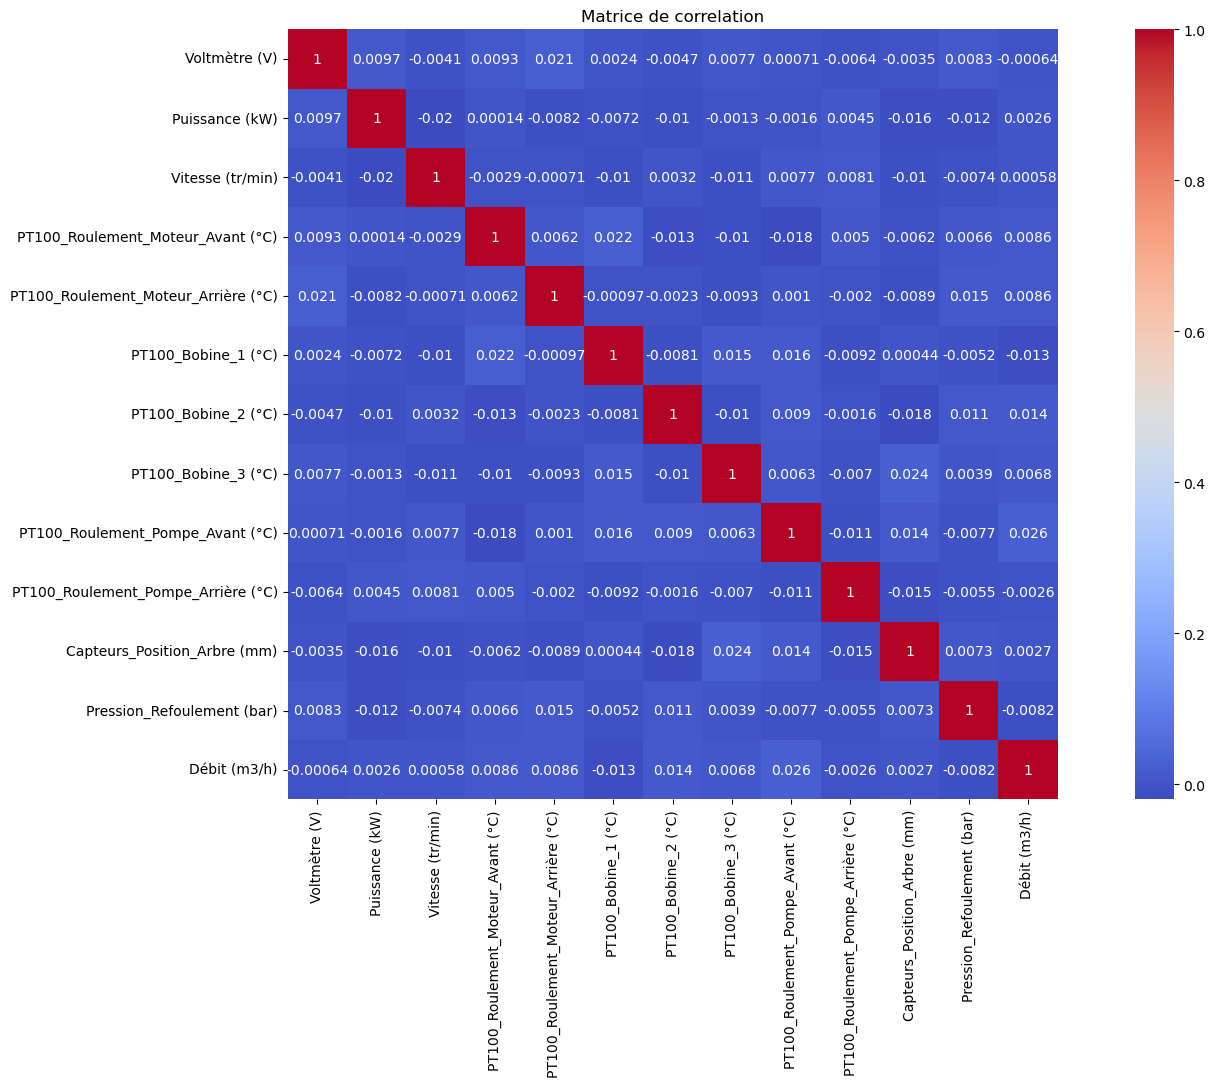

In [48]:
df_cor=df.drop('Type_Défaut', axis=1)
correlations=df_cor.corr()

plt.figure(figsize=(20,10))
sns.heatmap(correlations,annot=True,cmap='coolwarm',square=True)
plt.title('Matrice de correlation')
plt.show()

# gestion des valeurs manquantes

In [49]:
df_1 = df.dropna(axis=0)
df_1.info() 
defauts=df_1['Type_Défaut'].unique()
print("\n les defauts sont:\n",defauts,"\n le nombre de defauts egale a:\n ",len(defauts))

<class 'pandas.core.frame.DataFrame'>
Index: 7775 entries, 0 to 9997
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Voltmètre (V)                        7775 non-null   float64
 1   Puissance (kW)                       7775 non-null   float64
 2   Vitesse (tr/min)                     7775 non-null   float64
 3   PT100_Roulement_Moteur_Avant (°C)    7775 non-null   float64
 4   PT100_Roulement_Moteur_Arrière (°C)  7775 non-null   float64
 5   PT100_Bobine_1 (°C)                  7775 non-null   float64
 6   PT100_Bobine_2 (°C)                  7775 non-null   float64
 7   PT100_Bobine_3 (°C)                  7775 non-null   float64
 8   PT100_Roulement_Pompe_Avant (°C)     7775 non-null   float64
 9   PT100_Roulement_Pompe_Arrière (°C)   7775 non-null   float64
 10  Capteurs_Position_Arbre (mm)         7775 non-null   float64
 11  Pression_Refoulement (bar)         

# Séparations des  features (X) de la partie  cible (y)

In [50]:
X = df_1.drop('Type_Défaut', axis=1)
y = df_1['Type_Défaut']
X.columns

Index(['Voltmètre (V)', 'Puissance (kW)', 'Vitesse (tr/min)',
       'PT100_Roulement_Moteur_Avant (°C)',
       'PT100_Roulement_Moteur_Arrière (°C)', 'PT100_Bobine_1 (°C)',
       'PT100_Bobine_2 (°C)', 'PT100_Bobine_3 (°C)',
       'PT100_Roulement_Pompe_Avant (°C)',
       'PT100_Roulement_Pompe_Arrière (°C)', 'Capteurs_Position_Arbre (mm)',
       'Pression_Refoulement (bar)', 'Débit (m3/h)'],
      dtype='object')

# Encodage de  la variable cible

In [51]:
# L'encodage permet a renommer les defauts selon des nombres 
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Création d'un dictionnaire de correspondance
mapping = {index: label for index, label in enumerate(le.classes_)}

print("y encodé :", y_encoded)
print("Correspondance :", mapping)

y encodé : [3 4 3 ... 5 7 4]
Correspondance : {0: 'Anomalie électrique - tension', 1: 'Cavitation possible', 2: 'Débit insuffisant', 3: 'Normal', 4: 'Surcharge mécanique', 5: 'Surchauffe bobine', 6: 'Surchauffe roulement moteur', 7: 'Surchauffe roulement pompe', 8: 'Vibrations excessives'}


# Séparation des data en  train/test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrainement de mon modele 

In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Prediction du modèle 

In [54]:
y_pred = model.predict(X_test)

# Evaluation du modèle 

In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9967845659163987

Rapport de classification :
                               precision    recall  f1-score   support

Anomalie électrique - tension       1.00      1.00      1.00       217
          Cavitation possible       0.90      1.00      0.95        35
            Débit insuffisant       1.00      1.00      1.00       254
                       Normal       1.00      1.00      1.00       357
          Surcharge mécanique       1.00      1.00      1.00       248
            Surchauffe bobine       1.00      1.00      1.00       342
  Surchauffe roulement moteur       1.00      1.00      1.00        41
   Surchauffe roulement pompe       1.00      1.00      1.00        41
        Vibrations excessives       1.00      0.80      0.89        20

                     accuracy                           1.00      1555
                    macro avg       0.99      0.98      0.98      1555
                 weighted avg       1.00      1.00      1.00      1555



# Matrice de confusion 

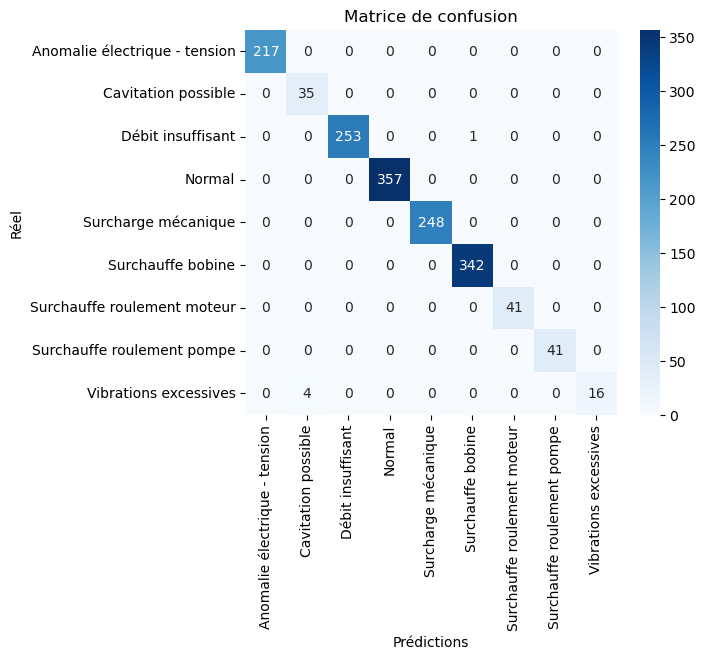

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# Importance des variables 

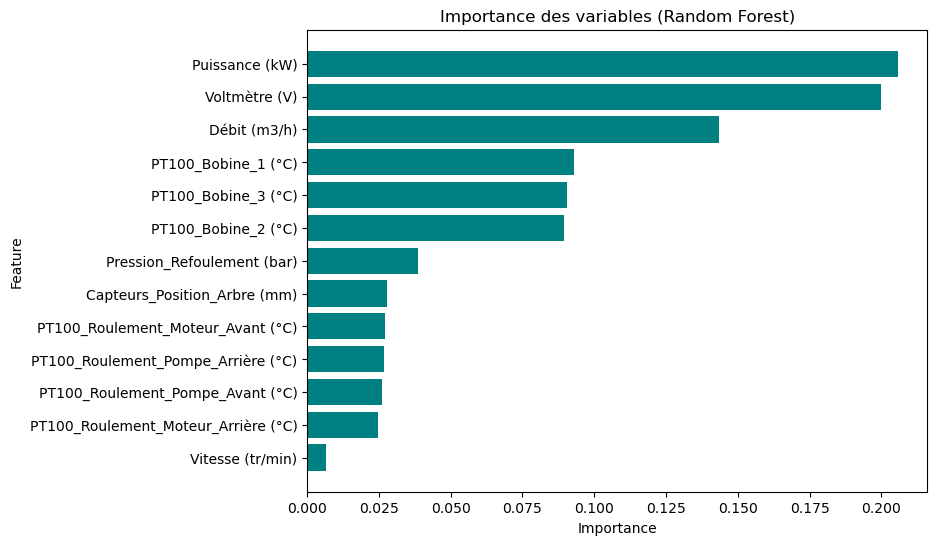

In [17]:

importances = model.feature_importances_
features = X.columns
df_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importance = df_importance.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,6))
plt.barh(df_importance['Feature'], df_importance['Importance'], color="teal")
plt.title("Importance des variables (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Representation de la courbe ROC et de la courbe Precision - Recall 

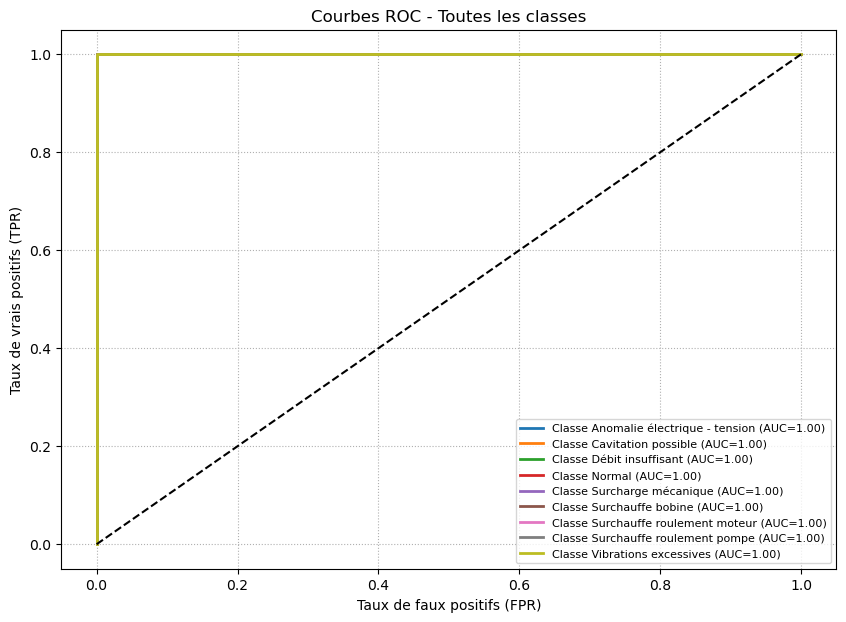

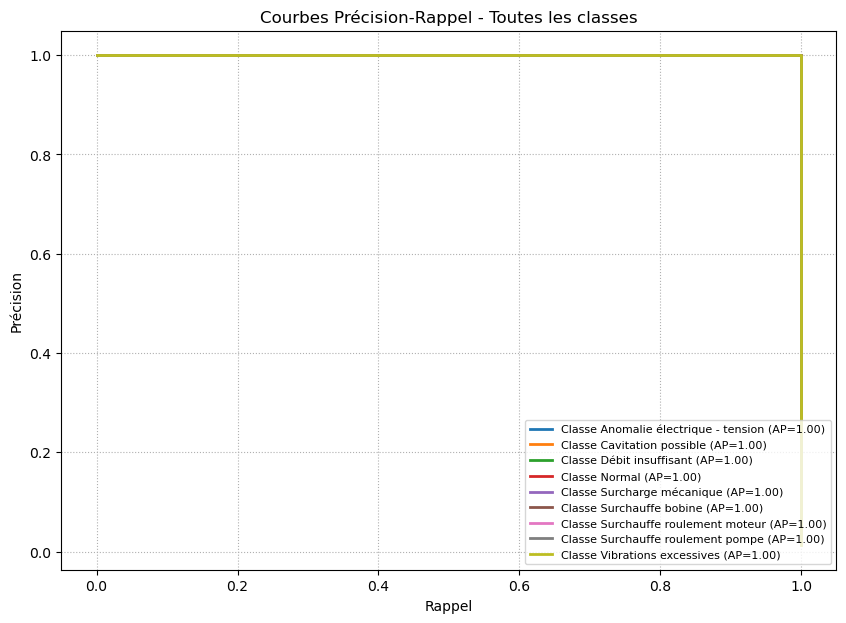

In [18]:
# Obtenir les probabilités de chaque classe
y_score = model.predict_proba(X_test)

# Liste des classes
classes = np.unique(y_test)
n_classes = len(classes)

# Binariser les labels
y_test_bin = label_binarize(y_test, classes=classes)

# ===============================
# ROC pour toutes les classes
# ===============================
plt.figure(figsize=(10,7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Classe {classes[i]} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC - Toutes les classes")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True, linestyle=":")
plt.show()

# ===============================
# Précision-Rappel pour toutes les classes
# ===============================
plt.figure(figsize=(10,7))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Classe {classes[i]} (AP={ap:.2f})')

plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbes Précision-Rappel - Toutes les classes")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True, linestyle=":")
plt.show()


# Testeur en entrant ses propres donnés

In [59]:
import ttkbootstrap as ttk
from ttkbootstrap.constants import *
import pandas as pd
import random

# Simulation du modèle (à remplacer par ton vrai modèle)
# model = ...
# le = ...

champs = [
    "Voltmètre (V)", "Puissance (kW)", "Vitesse (tr/min)",
    "PT100_Roulement_Moteur_Avant (°C)", "PT100_Roulement_Moteur_Arrière (°C)",
    "PT100_Bobine_1 (°C)", "PT100_Bobine_2 (°C)", "PT100_Bobine_3 (°C)",
    "PT100_Roulement_Pompe_Avant (°C)", "PT100_Roulement_Pompe_Arrière (°C)",
    "Capteurs_Position_Arbre (mm)", "Pression_Refoulement (bar)", "Débit (m3/h)"
]

plages_valeurs = {
    "Voltmètre (V)": (340.0, 800.0),
    "Puissance (kW)": (220.0, 1000.0),
    "Vitesse (tr/min)": (2797.0, 3213.0),
    "PT100_Roulement_Moteur_Avant (°C)": (20.0, 130.0),
    "PT100_Roulement_Moteur_Arrière (°C)": (20.0, 130.0),
    "PT100_Bobine_1 (°C)": (20.0, 150.0),
    "PT100_Bobine_2 (°C)": (20.0, 150.0),
    "PT100_Bobine_3 (°C)": (20.0, 150.0),
    "PT100_Roulement_Pompe_Avant (°C)": (20.0, 130.0),
    "PT100_Roulement_Pompe_Arrière (°C)": (20.0, 130.0),
    "Capteurs_Position_Arbre (mm)": (0.05, 0.5),
    "Pression_Refoulement (bar)": (5.0, 25.0),
    "Débit (m3/h)": (200.0, 530.0)
}

conseils_defauts = {
    'Normal': "✅ Tout est normal. Continuez le suivi régulier.",
    'Surchauffe roulement pompe': "🛠 Vérifiez les roulements de la pompe et la lubrification.",
    'Surcharge mécanique': "⚙️ Vérifiez les charges mécaniques et l'alignement.",
    'Débit insuffisant': "💧 Vérifiez les filtres, les vannes et le débit de la pompe.",
    'Anomalie électrique - tension': "🔌 Vérifiez la tension d'alimentation et les connexions électriques.",
    'Vibrations excessives': "🔧 Inspectez les supports, les roulements et l'alignement de l'arbre.",
    'Surchauffe bobine': "🌡️ Vérifiez le refroidissement et la température des bobines.",
    'Surchauffe roulement moteur': "🧰 Vérifiez la lubrification et l'état des roulements moteur.",
    'Cavitation possible': "⚠️ Vérifiez la pression d'aspiration et l'alimentation en liquide."
}

niveau_risque = {
    'Normal': "🟢 Faible",
    'Surchauffe roulement pompe': "🔴 Élevé",
    'Surcharge mécanique': "🔴 Élevé",
    'Débit insuffisant': "🟠 Moyen",
    'Anomalie électrique - tension': "🔴 Élevé",
    'Vibrations excessives': "🟠 Moyen",
    'Surchauffe bobine': "🔴 Élevé",
    'Surchauffe roulement moteur': "🔴 Élevé",
    'Cavitation possible': "🔴 Élevé"
}

entrees = {}

def remplir_aleatoirement():
    for champ, entree in entrees.items():
        if champ in plages_valeurs:
            min_val, max_val = plages_valeurs[champ]
            valeur = round(random.uniform(min_val, max_val), 2)
            entree.delete(0, 'end')
            entree.insert(0, str(valeur))

def predire_defaut():
    mesures = {}
    try:
        for champ, entree in entrees.items():
            valeur_str = entree.get().strip().replace(",", ".")
            if valeur_str == "":
                valeur_str = "0.0"
            valeur_str = ''.join(c for c in valeur_str if c.isdigit() or c == '.')
            mesures[champ] = float(valeur_str)

        df_mesures = pd.DataFrame([mesures])[model.feature_names_in_]

        prediction = model.predict(df_mesures)
        type_defaut = prediction[0]

        try:
            proba = model.predict_proba(df_mesures)
            indice = list(model.classes_).index(type_defaut)
            confiance = round(proba[0][indice]*100, 2)
            texte_confiance = f"{confiance}%"
        except:
            texte_confiance = "N/A"

        texte_resultat = (
            f"🔍 Type de défaut prédit :\n{type_defaut}\n\n"
            f"💡 Conseil :\n{conseils_defauts.get(type_defaut,'Aucun conseil')}\n\n"
            f"⚠️ Niveau de risque :\n{niveau_risque.get(type_defaut,'N/A')}\n\n"
            f"📊 Confiance du modèle :\n{texte_confiance}"
        )
        label_resultat.config(text=texte_resultat, foreground="#f39c12", justify='left', anchor='nw')

    except Exception as e:
        label_resultat.config(
            text=f"❌ Erreur : {str(e)}",
            foreground="red",
            justify='center',
            anchor='center'
        )

# Fenêtre principale avec thème solar
fenetre = ttk.Window(themename="solar")
fenetre.title("🔧 Prédiction des Défauts - Machine Learning")
fenetre.geometry("1000x750")

# Titre
titre = ttk.Label(
    fenetre,
    text="🛠 Interface de prédiction de défauts de pompe électrique",
    font=("Arial", 18, "bold"),
    bootstyle="warning"
)
titre.pack(pady=20)

# Cadre principal
cadre_principal = ttk.Frame(fenetre)
cadre_principal.pack(fill='both', expand=True, padx=15, pady=10)
cadre_principal.columnconfigure(0, weight=1)
cadre_principal.columnconfigure(1, weight=1)
cadre_principal.rowconfigure(0, weight=1)

# Partie gauche : saisie
cadre_haut = ttk.LabelFrame(cadre_principal, text="🔢 Données d'entrée", padding=15, bootstyle="info")
cadre_haut.grid(row=0, column=0, sticky="nsew", padx=10, pady=10)
cadre_haut.columnconfigure(1, weight=1)

for i, champ in enumerate(champs):
    label = ttk.Label(cadre_haut, text=champ + " :", font=("Arial", 10, "bold"))
    label.grid(row=i, column=0, sticky="w", pady=5, padx=5)
    entree = ttk.Entry(cadre_haut)
    entree.grid(row=i, column=1, sticky="ew", pady=5, padx=5)
    entrees[champ] = entree

# Ligne des boutons
ligne_boutons = ttk.Frame(cadre_haut)
ligne_boutons.grid(row=len(champs), column=0, columnspan=2, pady=10)

btn_predire = ttk.Button(
    ligne_boutons, text="🔍 Lancer la prédiction", command=predire_defaut,
    bootstyle="success"
)
btn_predire.pack(side="left", padx=10)

btn_random = ttk.Button(
    ligne_boutons, text="🎲 Remplir aléatoirement", command=remplir_aleatoirement,
    bootstyle="warning"
)
btn_random.pack(side="left", padx=10)

# Partie droite : résultat
cadre_bas = ttk.LabelFrame(cadre_principal, text="📋 Résultat de la prédiction", padding=15, bootstyle="secondary")
cadre_bas.grid(row=0, column=1, sticky="nsew", padx=10, pady=10)
cadre_bas.columnconfigure(0, weight=1)
cadre_bas.rowconfigure(0, weight=1)

label_resultat = ttk.Label(
    cadre_bas,
    text="🕒 En attente de prédiction...",
    font=("Arial", 12),
    wraplength=400,
    justify='left',
    anchor='nw'
)
label_resultat.grid(row=0, column=0, sticky="nsew", padx=10, pady=10)

fenetre.mainloop()
